# Niveles de agua del Lago Cocibolca basado en altimetria satelital

1/11/2021

- [IPAD pagina web, Lago Cocibolca](https://ipad.fas.usda.gov/cropexplorer/global_reservoir/gr_regional_chart.aspx?regionid=ca&reservoir_name=Nicaragua)
- [IPAD archivo KML con puntos del "track" del sensor altimetrico](https://ipad.fas.usda.gov/rssiws/ggeoxml/351_Nicaragua.kml)
- https://appliedsciences.nasa.gov/join-mission/training/english/mapping-and-monitoring-lakes-and-reservoirs-satellite-observations
- https://appliedsciences.nasa.gov/our-impact/news/africa-flores-breakthrough-scientist

In [4]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [5]:
matplotlib.style.use('ggplot')

## Acceder e ingerir los datos de la web

In [6]:
kmlurl = "https://ipad.fas.usda.gov/rssiws/ggeoxml/351_Nicaragua.kml"

In [10]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'r'

See this good reference for reading KMLs and their complexities: https://gis.stackexchange.com/questions/328525/geopandas-read-file-only-reading-first-part-of-kml

In [11]:
gdf = gpd.read_file(kmlurl, driver='KML')

/home/mayorga/miniconda/envs/nica_natur_jb/lib/python3.8/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [3]:
fname = 'lake0351.10d.2.smooth.txt'

In [4]:
url = f"https://ipad.fas.usda.gov/lakes/images/{fname}"
url

'https://ipad.fas.usda.gov/lakes/images/lake0351.10d.2.smooth.txt'

- Try using `infer_datetime_format` or `date_parser`
- Cambiar los nombres de las columnas a espanol

In [5]:
df0 = pd.read_csv(url, names=['fecha', 'hora', 'minuto', 'nivel', 'nivel_egm2008'],
                  skiprows=12, index_col=False, sep='\s+')

In [6]:
len(df0)

1098

In [7]:
df0.tail()

,fecha,hora,minuto,nivel,nivel_egm2008
1093,20200908,19,38,0.15,32.18
1094,20200918,17,37,0.24,32.27
1095,20200928,15,35,0.29,32.32
1096,20201008,13,34,0.32,32.35
1097,20201018,11,32,0.40,32.43


In [8]:
df0.dtypes

fecha              int64
hora               int64
minuto             int64
nivel            float64
nivel_egm2008    float64
dtype: object

## Pre-procesar y suplementar los datos ingeridos

In [9]:
df = df0[(df0['fecha'] != 99999999) & (df0['nivel'] < 999)].copy()
len(df)

1068

In [10]:
# Time *must* be zero-padded in conversion from integer to string
df.insert(1, 'FechaTiempo', 
          pd.to_datetime(
              df['fecha'].map(str) 
              + df['hora'].map(lambda nbr: "{0:02d}".format(nbr))
              + df['minuto'].map(lambda nbr: "{0:02d}".format(nbr)),
              format='%Y%m%d%H%M')
         )

In [11]:
df.drop(['fecha', 'hora', 'minuto'], axis=1, inplace=True)

In [12]:
df.head()

,FechaTiempo,nivel,nivel_egm2008
0,1992-10-02 14:54:00,-0.19,31.84
1,1992-10-12 12:52:00,-0.04,31.99
2,1992-10-22 10:51:00,-0.07,31.96
3,1992-11-01 08:49:00,-0.05,31.98
4,1992-11-11 06:48:00,-0.05,31.98


In [13]:
df['año'] = df.FechaTiempo.dt.year
df['mes'] = df.FechaTiempo.dt.month
df['dia'] = df.FechaTiempo.dt.day
df['dda'] = df.FechaTiempo.dt.dayofyear

## Explorar patrones temporales

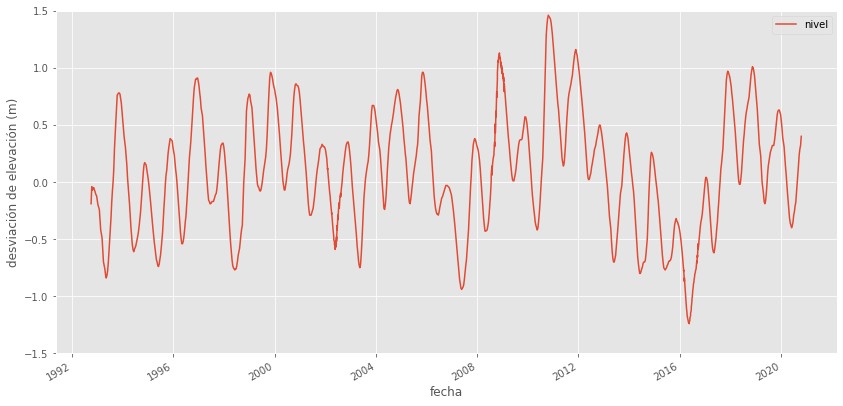

In [14]:
df.plot(x='FechaTiempo', y='nivel', ylim=(-1.5, 1.5), figsize=(14, 7))
plt.ylabel('desviación de elevación (m)')
plt.xlabel('fecha');

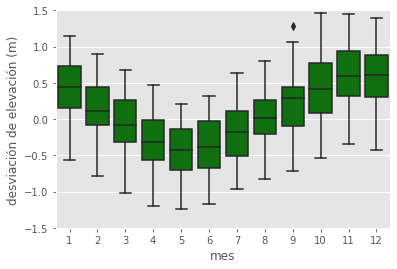

In [15]:
sns.boxplot(data=df, x='mes', y='nivel', color='g');
plt.ylim(-1.5, 1.5)
plt.xlabel('mes')
plt.ylabel('desviación de elevación (m)'); 

Plot of desvaciones de elevacion vs doy (dia del an-o, dda), labelled by year

**TODO:** Change x axis labelling to show months rather than just dda integers

In [16]:
# df.plot.scatter(x="dda", y="nivel", c="año");

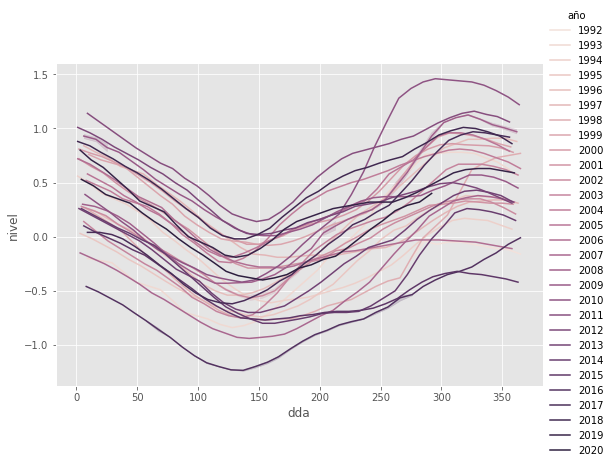

In [17]:
# markers=True, dashes=False: these have no effect

palette = sns.cubehelix_palette(light=.9, n_colors=29)

sns.relplot(data=df, x="dda", y="nivel", hue="año", kind='line', palette=palette,
            height=5, aspect=1.5);

In [18]:
dfg = df.groupby('año')

In [19]:
dfheightrange = dfg.nivel.max() - dfg.nivel.min()

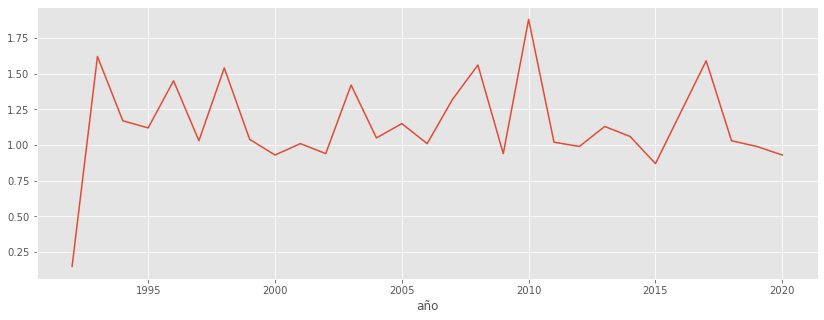

In [20]:
dfheightrange.plot(figsize=(14,5));

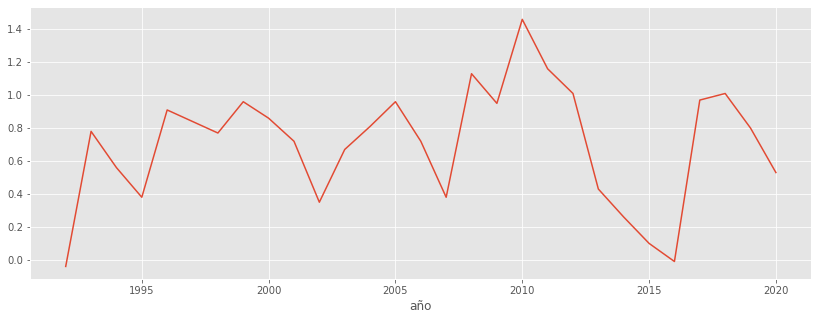

In [21]:
dfg.nivel.max().plot(figsize=(14,5));

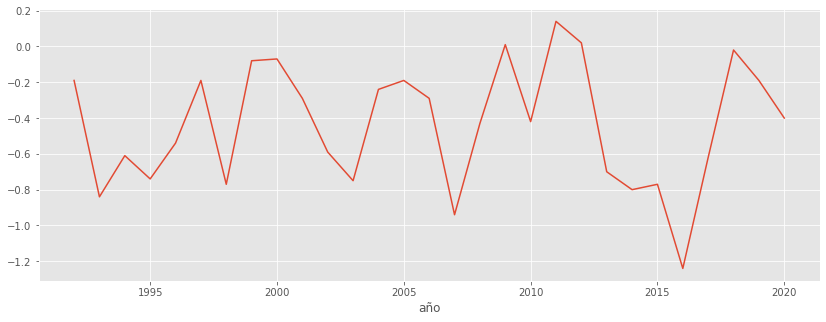

In [22]:
dfg.nivel.min().plot(figsize=(14,5));